# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('data/cars_multivariate.csv')

You just received a bunch of data...  What's your first move?

Start with a very high level overview
- What do the first few rows look like?
- What feature does each column denote?
- Which features are categorical and what is the distribution for the categorical levels?
- Which features are continuous and how would I characterize the distribution?
- Are there any missing values?
- What is the target denote?  What does the target's distribution look like?
- How does the features relate to one another?
- How does each feature relate to the target?

In [4]:
# df.values turns the dataframe into a numpy array
df.values.shape

(398, 9)

In [5]:
# grabs the first few rows
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [6]:
# gives overview statistics on numerical columns
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# help check for missing values and improperly formatted datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.car_name.unique().shape

(305,)

In [9]:
df.groupby('car_name').size()

car_name
amc ambassador brougham            1
amc ambassador dpl                 1
amc ambassador sst                 1
amc concord                        2
amc concord d/l                    1
amc concord dl                     1
amc concord dl 6                   1
amc gremlin                        4
amc hornet                         4
amc hornet sportabout (sw)         1
amc matador                        5
amc matador (sw)                   2
amc pacer                          1
amc pacer d/l                      1
amc rebel sst                      1
amc spirit dl                      1
audi 100 ls                        1
audi 100ls                         2
audi 4000                          1
audi 5000                          1
audi 5000s (diesel)                1
audi fox                           1
bmw 2002                           1
bmw 320i                           1
buick century                      2
buick century 350                  1
buick century limited        

In [20]:
# this column is weird....do some feature enginering
df['make'] = df.car_name.apply(lambda x: x.split()[0])

In [21]:
df.make.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', 'subaru',
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'mercedes',
       'vokswagen', 'triumph', 'nissan'], dtype=object)

Do the variable types make sense?  Notice that horsepower has variable type 'object'; this doesn't seem right.

In [12]:
df.horsepower.tail().values

array(['86.00', '52.00', '84.00', '79.00', '82.00'], dtype=object)

In [13]:
df['horsepower'].head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: object

All the values that we can see look like numbers.  If they were all numbers, `pandas` should have figured out the correct data type; there must be a "weird" value somewhere.

In [14]:
# Force convert horsepower to numeric
horsepower = pd.to_numeric(df.horsepower, errors = 'coerce')

horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374      NaN
375     74.0
376     68.0
377     68.0
378     63.0
379     70.0
380     88.0
381     75.0
382     70.0
383     67.0
384     67.0
385     67.0
386    110.0
387     85.0
388     92.0
389    112.0
390     96.0
391     84.0
392     90.0
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [15]:
# Check out the bad values
df.loc[horsepower.isnull(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,make
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto,ford
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick,ford
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe,renault
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra,ford
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i,renault
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl,amc


In [18]:
# Reload the data, but tell pandas to treat '?' as missing
df = pd.read_csv('data/cars_multivariate.csv', na_values = ['?'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [19]:
# Let's just drop those rows
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [11]:
# What about origin?
df.origin.value_counts(dropna = False)

1    245
3     79
2     68
Name: origin, dtype: int64

In [22]:
df.origin.value_counts(dropna = False).sum()

392

In [23]:
# What about model?
df.model.value_counts(dropna = False).sum()

392

In [24]:
df.origin = df.origin.astype(str)
df.model = 1900 + df.model

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null object
car_name        392 non-null object
make            392 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 33.7+ KB


In [26]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'make'],
      dtype='object')

In [27]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model             int64
origin           object
car_name         object
make             object
dtype: object

Our data set has <=7 numeric variables (ints and floats) and 2+ categorical variables (assue objects but some of the integer columns should be treated differently - we'll see).  Sometimes it is good to keep track of these:

In [28]:
numerical_vars = [col for col, typ in zip(df.columns, df.dtypes) if typ == 'float64' or typ == 'int64']

In [29]:
categorical_vars = [col for col, typ in zip(df.columns, df.dtypes) if typ == 'object']

## More Exploration

### Univariate-Numeric Visualization

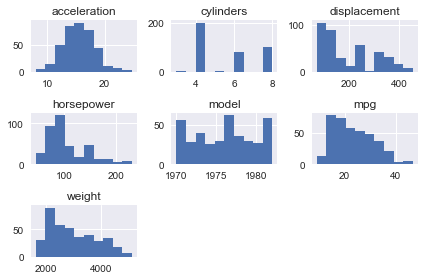

In [30]:
# Histograms
df[numerical_vars].hist(bins = 10)
plt.tight_layout()

In [31]:
# origin and cylinders look like categorical....so let's remove those, and add to categorical list
# numerical_vars.remove('origin')
numerical_vars.remove('cylinders')

categorical_vars.extend(['cylinders'])

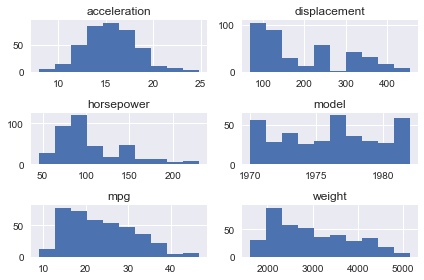

In [32]:
# Histograms
df[numerical_vars].hist(bins = 10)
plt.tight_layout()

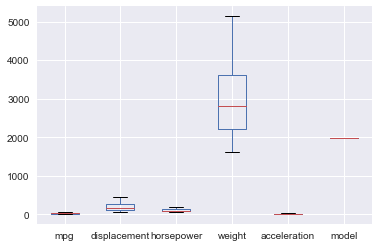

In [33]:
# Boxplots - visualize the minimum, first quartile, median, third quartile, and maximum
df[numerical_vars].plot(kind = 'box')

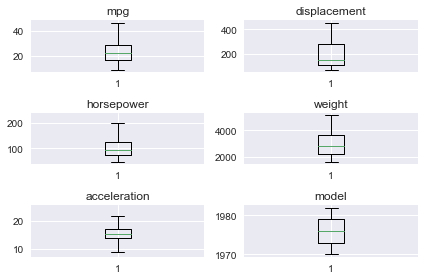

In [34]:
# To better visualize the boxplots, let's plot them one at a time

fig, axes = plt.subplots(3, 2)

for ax, x in zip(axes.ravel(), numerical_vars):
    ax.boxplot(df[x])
    ax.set_title(x)

plt.tight_layout()

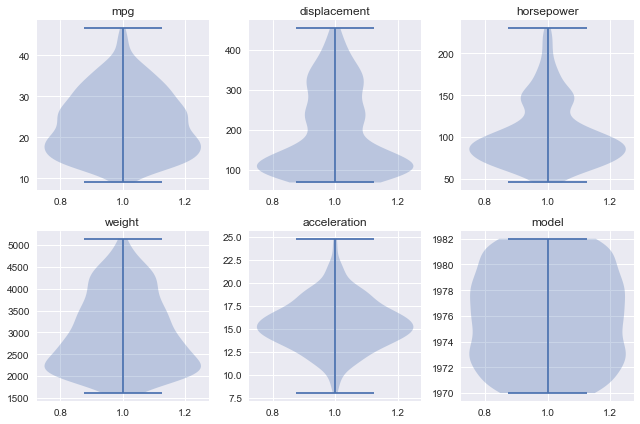

In [35]:
# because Adam loves these

fig, axes = plt.subplots(2, 3, figsize = (9, 6))

for ax, x in zip(axes.ravel(), numerical_vars):
    ax.violinplot(df[x])
    ax.set_title(x)

plt.tight_layout()

### Univariate - Categorical

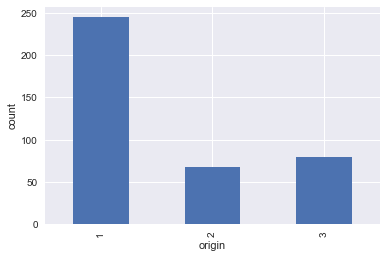

In [36]:
# Categorical
agg = df.groupby('origin').size()
agg.plot(kind = 'bar').set_ylabel('count')

In [37]:
# this is ugly
# df.groupby('origin').count()

In [38]:
gb = df.groupby('origin')

In [39]:
gb.agg(['mean', 'count', 'max'])['mpg']

,mean,count,max
origin,,,
1,20.033469,245,39.0
2,27.602941,68,44.3
3,30.450633,79,46.6


In [43]:
df.apply(pd.Categorical).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,make
count,392.0,392,392.0,392.0,392.0,392.0,392,392,392,392
unique,127.0,5,81.0,93.0,346.0,95.0,13,3,301,37
top,13.0,4,97.0,150.0,1985.0,14.5,1973,1,ford pinto,ford
freq,20.0,199,21.0,22.0,4.0,23.0,40,245,5,48


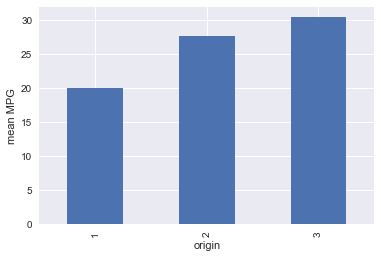

In [40]:
# Categorical vs. Numeric
agg = df.groupby('origin').mpg.mean()
agg.plot(kind = 'bar').set_ylabel('mean MPG')

origin  cylinders
1       4            28.013043
        6            19.645205
        8            14.963107
2       4            28.106557
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64
===
cylinders      3          4          5          6          8
origin                                                      
1            NaN  28.013043        NaN  19.645205  14.963107
2            NaN  28.106557  27.366667  20.100000        NaN
3          20.55  31.595652        NaN  23.883333        NaN
===


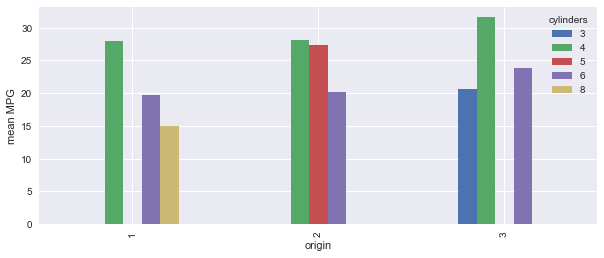

In [51]:
# Categorical vs. categorical vs. numeric

agg = df.groupby(['origin', 'cylinders']).mpg.mean()
print(agg)
print('===')

agg = agg.unstack(level = 'cylinders')
print(agg)
print('===')

fig, ax = plt.subplots(1, 1, figsize = (10, 4))
agg.plot(kind = 'bar', ax = ax).set_ylabel('mean MPG')

### Numeric vs. Numeric

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


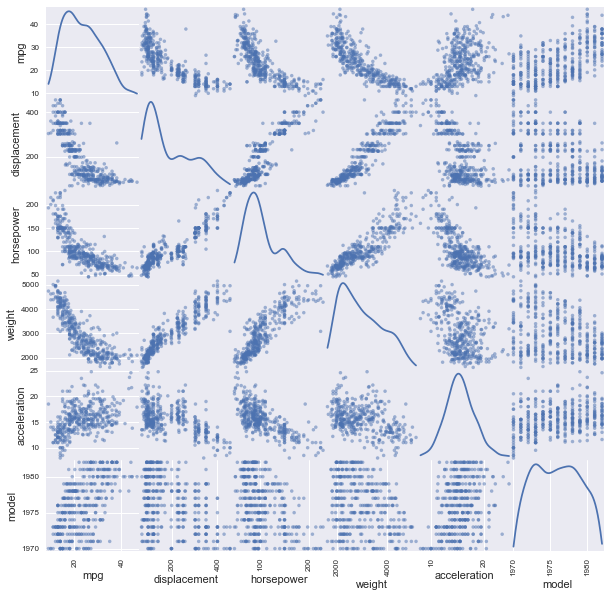

In [52]:
# Scatterplot matrix
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax = pd.tools.plotting.scatter_matrix(df[numerical_vars], ax = ax, diagonal = 'kde')

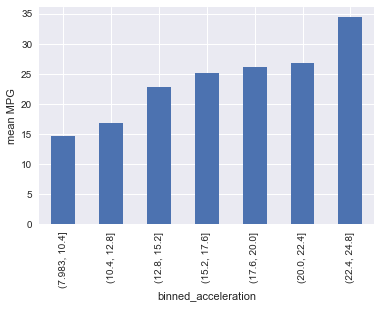

In [53]:
# Use binning to see relationships more clearly
df['binned_acceleration'] = pd.cut(df.acceleration, bins = 7)
agg = df.groupby('binned_acceleration').mpg.mean()
agg.plot(kind = 'bar').set_ylabel('mean MPG')

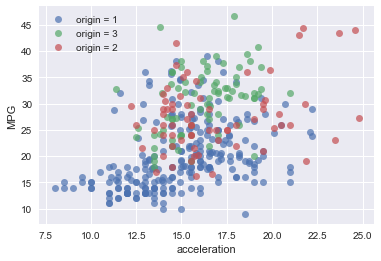

In [55]:
# Scatter plot by category
origins = df.origin.unique()

for origin in origins:
    plt.plot(df.loc[df.origin == origin, 'acceleration'], 
             df.loc[df.origin == origin, 'mpg'], 
             linestyle = '',
             marker = 'o',
             alpha = .7,
             label = 'origin = ' + origin)

plt.xlabel('acceleration')
plt.ylabel('MPG')
plt.legend(numpoints = 1)

In [26]:
# Categorical vs Categorical

pd.crosstab(df.origin, df.model)

model,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


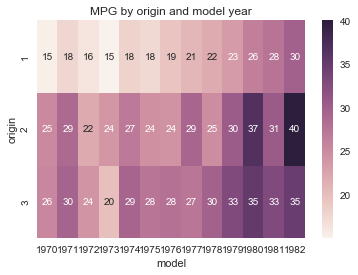

In [54]:
# Heat-map
agg = df.groupby(['origin', 'model']).mpg.mean()
ax = sns.heatmap(agg.unstack(level = 'model'), annot = True)
ax.set_title('MPG by origin and model year')

## Linear Regression

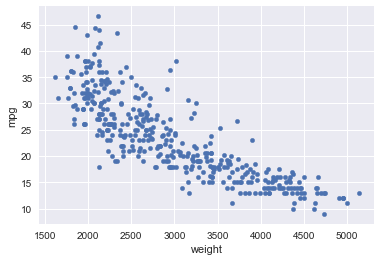

In [55]:
# Single variable regression

df.plot('weight', 'mpg', kind = 'scatter')

Linear regression is just the fancy term for finding the line of best fit.  If I was going to eyeball it from this data, I would draw the line from (1000, 40) through (5500, 5).

In other words, we are looking for the intercept ($alpha$) and slope ($beta$) that defines a line that fits the data as well as possible.

'As well as possible' means that we are trying to minimize the mean-squared-error.

(1000.0, 5500.0)

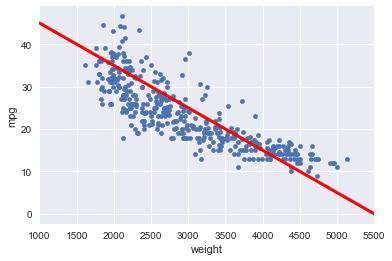

In [57]:
# Make a guess at the line of best fit
a = [1000, 45]
b = [5500, 0]

# Solve
def get_line_equation(a, b):
    """
    Solve the system of equations:
    y1 = alpha + beta * x1
    y2 = alpha + beta * x2
    
    Input:
    a: first point [x1, y1]
    b: second point [x2, y2]
    
    returns: alpha (intercept), beta (slope)
    """

    X = [[1, a[0]], [1, b[0]]]
    y = [[a[1]], [b[1]]]

    soln = np.linalg.solve(X, y)
    return soln[0][0], soln[1][0]

alpha, beta = get_line_equation(a, b)

# print('alpha =', alpha
# print 'beta  =', beta

# Plot the line along with the data
ax = df.plot('weight', 'mpg', kind = 'scatter')

xs = np.linspace(1000, 5500, 100)
ys = alpha + beta * xs

ax.plot(xs, ys, color = 'red', lw = 3)
ax.set_xlim([xs.min(), xs.max()])

How can we measure the error?  The typical choice is to use mean squared error.  The error for a given data point is the difference between the observed value and the predicted value

$$MSE = \frac{1}{n} \sum_{i = 1} ^ n (y_i - (\alpha + \beta x_i)) ^ 2$$

In [58]:
# Mean Squared Error

def mean_squared_error(X, y, alpha, beta):
    """
    Compute the mean squared error, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    predicted = alpha + beta * X
    error = y - predicted
    mse = np.mean(error ** 2)
    return mse

mean_squared_error(df.weight, df.mpg, alpha, beta)

25.8219818877551

## R-Squared

Mean squared error is a good error metric, but it is not comparable across different data sets.  For this we use a scaled version called $R^2$.

\begin{align}
    R^2 &= 1 - \frac{SS_{residuals}}{SS_{total}} \\
    &= 1 - \frac{\sum_{i = 1} ^ n (y_i - (\alpha + \beta x_i))^2}{\sum_{i = 1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{residuals}$ is the sum of the squared residuals and $SS_{total}$ is the total sum of squares.  $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

$R^2$ will be between 0 and 1.  0 means that your model explains none of the variance in the data, while 1 means your model explains all of the variance in the data.  The higher $R^2$, the better!

In [59]:
# Calculate r-squared

def rsquared(X, y, alpha, beta):
    """
    Compute the r-squared, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """

    predicted = alpha + beta * X
    residuals = y - predicted
    
    ss_residuals = np.sum(residuals ** 2)
    ss_total = np.sum((y - y.mean()) ** 2)
    
    rsquared = 1 - ss_residuals / ss_total

    return rsquared

rsquared(df.weight, df.mpg, alpha, beta)

0.575035909346501

## Ordinary Least Squares (OLS)

It turns out that we can find the slope and intercept which *minimize* the mean squared error, using a procedure called Ordinary Least Squares.

Ordinary Least Squares is implemented in the `statsmodels` package.  The advantage of this package is that we also have access to a number of *regression diagnostics.*

In [62]:
# Choose the predictor and add a constant term
# (allow for an intercept)

X = df['weight']
X_int = sm.add_constant(X)

y = df.mpg

# Create a linear regression object
model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 25 Sep 2017   Prob (F-statistic):          6.02e-102
Time:                        14:32:05   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
print(X_int)

     const  weight
0      1.0  3504.0
1      1.0  3693.0
2      1.0  3436.0
3      1.0  3433.0
4      1.0  3449.0
5      1.0  4341.0
6      1.0  4354.0
7      1.0  4312.0
8      1.0  4425.0
9      1.0  3850.0
10     1.0  3563.0
11     1.0  3609.0
12     1.0  3761.0
13     1.0  3086.0
14     1.0  2372.0
15     1.0  2833.0
16     1.0  2774.0
17     1.0  2587.0
18     1.0  2130.0
19     1.0  1835.0
20     1.0  2672.0
21     1.0  2430.0
22     1.0  2375.0
23     1.0  2234.0
24     1.0  2648.0
25     1.0  4615.0
26     1.0  4376.0
27     1.0  4382.0
28     1.0  4732.0
29     1.0  2130.0
..     ...     ...
367    1.0  2605.0
368    1.0  2640.0
369    1.0  2395.0
370    1.0  2575.0
371    1.0  2525.0
372    1.0  2735.0
373    1.0  2865.0
375    1.0  1980.0
376    1.0  2025.0
377    1.0  1970.0
378    1.0  2125.0
379    1.0  2125.0
380    1.0  2160.0
381    1.0  2205.0
382    1.0  2245.0
383    1.0  1965.0
384    1.0  1965.0
385    1.0  1995.0
386    1.0  2945.0
387    1.0  3015.0
388    1.0  

In [63]:
df[['weight']].values.shape

(392, 1)

In [64]:
df['weight'].values.shape

(392,)

In [71]:
model.

0      -1.420236
1      -2.974889
2      -1.940256
3      -3.963198
4      -2.840840
5       1.980589
6       1.080005
7       0.758816
8       1.622966
9      -1.774256
10     -3.969043
11     -4.617265
12     -2.454869
13     -8.616825
14     -4.077028
15     -2.551603
16     -7.002796
17     -5.432849
18     -2.927685
19     -6.183651
20     -0.782825
21     -3.633482
22     -3.054086
23     -3.132361
24     -4.966362
25     -0.924039
26     -2.751754
27     -1.705870
28     -1.029300
29     -2.927685
         ...    
367     1.704803
368     0.972460
369     6.098861
370     4.475382
371     2.093015
372     1.698957
373    -0.306888
375     4.925214
376     6.269344
377    -0.151260
378     8.034078
379     6.034078
380     6.301735
381     6.645866
382     4.951759
383     6.810504
384     0.810504
385     7.039924
386     1.304899
387    14.840213
388    -0.448144
389    -2.536308
390     6.163643
391     7.907677
392     3.343136
393     2.119561
394    14.072315
395     3.3341

In [65]:
# print 'alpha =', model.params.const
# print 'beta  =', model.params.weight
alpha = model.params.const
beta = model.params.weight

In [66]:
alpha

46.216524549017592

In [67]:
beta

-0.007647342535779574

## Model Diagnostics

**coef** - The values of the coefficients in the model

**$P>|t|$** - The p-value of the null hypothesis that a specific parameter is zero.

**R-Squared** - Proportion of variance explained by the model. Measured on a scale from 0 (bad) to 1 (good)

**Prob (F-statistic)** - p-value of the F-statistic. This is the probability of the null hypothesis that *all parameters in the model are zero*

(1000.0, 5500.0)

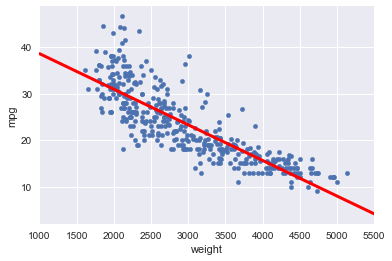

In [74]:
# Plot the line along with the data

alpha = model.params.const # 46.2165
beta = model.params.weight # -.0076

ax = df.plot('weight', 'mpg', kind = 'scatter')

xs = np.linspace(1000, 5500, 100)
ys = alpha + beta * xs

ax.plot(xs, ys, color = 'red', lw = 3)

ax.set_xlim([xs.min(), xs.max()])

This line is a better fit than our original guess.  We can tell because its $R^2$ is higher, meaning it explains the MPG's variance better.  The MSE of this fit will be lower (better) than our original guess as well.

### sklearn

We can also use scikit-learn linear regression. The syntax is more intuitive, and you will be using the sklearn models for the majority of the rest of the course. HOWEVER, it lacks the cool model summary that statsmodels has 

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()

In [79]:
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)